In [63]:
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('train (2).csv')

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
new_df = df[['Survived',	'Pclass',	'Sex',	'Age']]

In [26]:
new_df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [40]:
sur_df = new_df.query('Survived == 1')

In [41]:
sur_df

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
8,1,3,female,27.0
9,1,2,female,14.0
...,...,...,...,...
875,1,3,female,15.0
879,1,1,female,56.0
880,1,2,female,25.0
887,1,1,female,19.0


In [42]:
sur_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,136
2,87
3,119


<AxesSubplot:>

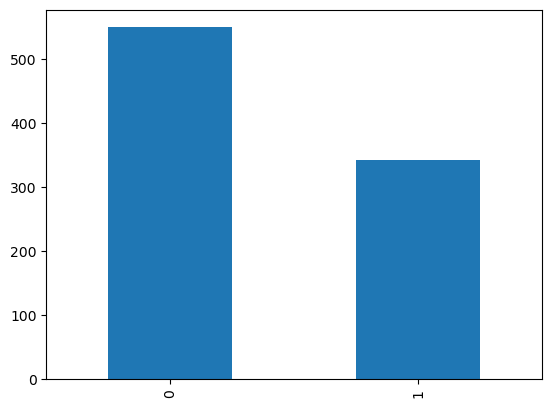

In [54]:
df.Survived.value_counts().plot.bar()

In [43]:
sur_df[['Sex','Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,233
male,109


In [57]:
data = df.Survived.value_counts().to_frame()

In [58]:
data

,Survived
0,549
1,342


In [59]:
data = df.Survived.value_counts().reset_index()

In [60]:
data

,index,Survived
0,0,549
1,1,342


<AxesSubplot:xlabel='Survived', ylabel='Age'>

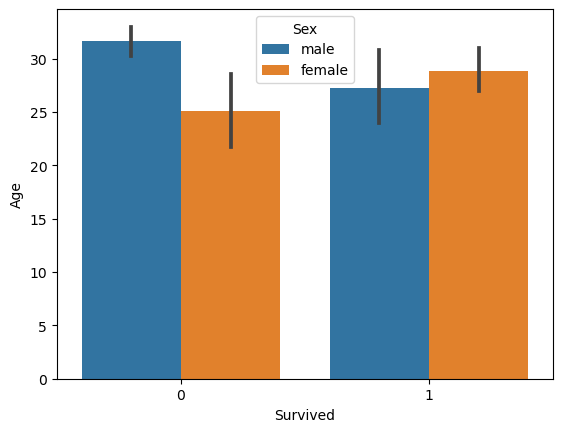

In [62]:
sns.barplot(data=df, x = 'Survived', y = 'Age', hue = 'Sex')

In [36]:
died_df = new_df.query('Survived == 0')

In [37]:
died_df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,NaN
6,0,1,male,54.0
7,0,3,male,2.0
...,...,...,...,...
884,0,3,male,25.0
885,0,3,female,39.0
886,0,2,male,27.0
888,0,3,female,NaN


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


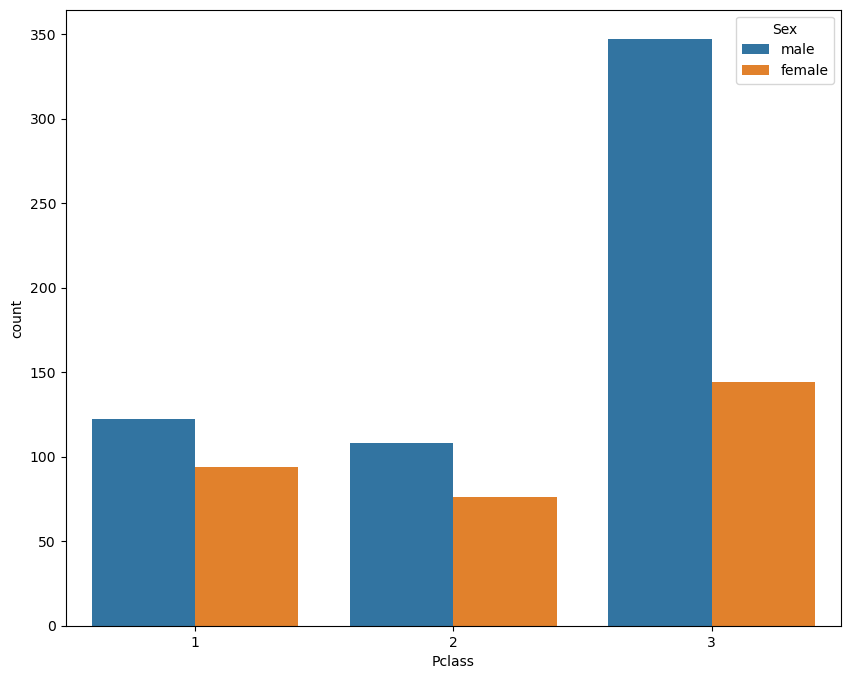

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(df['Pclass'], x = df.Pclass, hue = df['Sex'])
plt.show()

In [38]:
died_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,80
2,97
3,372


In [39]:
died_df[['Sex','Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,81
male,468


In [49]:
died_df[['Age','Survived']].groupby(['Age']).count()

,Survived
Age,
1.0,2
2.0,7
3.0,1
4.0,3
6.0,1
...,...
66.0,1
70.0,2
70.5,1


In [24]:
new_df[['Sex','Survived']].groupby(['Age']).count()

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


In [46]:
sur_df.groupby(['Survived','Sex']).agg({"Age": "mean"}).round(2)

Age
Survived Sex          
1        female  28.85
         male    27.28

In [47]:
sur_df.groupby(['Survived','Sex']).agg({"Age": "min"}).round(2)

Age
Survived Sex         
1        female  0.75
         male    0.42

In [48]:
sur_df.groupby(['Survived','Sex']).agg({"Age": "max"}).round(2)

Age
Survived Sex         
1        female  63.0
         male    80.0